<a href="https://colab.research.google.com/github/ddopazo92/Introduccion_datascience_diego_dopazo/blob/main/Primer%20entrega.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [165]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


url = 'https://raw.githubusercontent.com/ddopazo92/Introduccion_datascience_diego_dopazo/refs/heads/main/Video_Games.csv'

df = pd.read_csv(url, sep=';')

##REEMPLAZO DE PALABRAS EN INGLES A ESPAÑOL
df = df.set_axis(['Juego', 'Consola', 'Año de lanzamiento','Genero', 'Publicador', 'Ventas USA','Ventas Europa', 'Ventas Japon','Ventas resto del Mundo',
                  'Ventas Totales', 'Puntuacion de criticos','Cantidad de criticos', 'Puntaje de Usuario','Cantidad de usuarios','Desarrollador','Clasificacion por Edad'], axis=1)

df['Juego'] = df['Juego'].str.upper()
df['Genero'] = df['Genero'].str.replace('Action','Accion')
df['Genero'] = df['Genero'].str.replace('Adventure','Aventura')
df['Genero'] = df['Genero'].str.replace('Fighting','Lucha')
df['Genero'] = df['Genero'].str.replace('Misc','Miscelania')
df['Genero'] = df['Genero'].str.replace('Platform','Plataforma')
df['Genero'] = df['Genero'].str.replace('Racing','Carreras')
df['Genero'] = df['Genero'].str.replace('Role-Playing','RPG')
df['Genero'] = df['Genero'].str.replace('Shooter','Disparos')
df['Genero'] = df['Genero'].str.replace('Simulation','Simulacion')
df['Genero'] = df['Genero'].str.replace('Sports','Deportes')
df['Genero'] = df['Genero'].str.replace('Strategy','Estrategia')

#LE DI EL MISMO CRITERIO DE PUNTAJE A LOS USAURIOS COMO TIENEN LOS CRITICOS
puntaje_usuarios= [n * 10 for n in df['Puntaje de Usuario']]

##ESTO DA EL PUNTAJE PROMEDIO ENTRE LOS USUARIOS Y LA CRITICA

df['promedio de puntaje']= (df['Puntuacion de criticos'] + puntaje_usuarios)/2
df['cantidad promedio de criticas'] = (df['Cantidad de criticos'] + df['Cantidad de usuarios'])/2




In [119]:
df.describe()



,Año de lanzamiento,Ventas USA,Ventas Europa,Ventas Japon,Ventas resto del Mundo,Ventas Totales,Puntuacion de criticos,Cantidad de criticas,Puntaje de Usuario,Cantidad de usuarios,promedio de puntaje
count,7435.000000,6760.000000,6370.000000,2100.000000,6038.000000,7435.000000,6867.000000,6867.000000,7434.000000,7435.000000,6867.000000
mean,2007.687962,0.416006,0.264662,0.212767,0.098559,0.745303,70.265327,28.854522,7.125599,163.157767,38.724152
std,4.297550,0.970568,0.710251,0.488296,0.286302,1.892162,13.863650,19.201735,1.498118,564.631862,7.372769
min,1985.000000,0.010000,0.010000,0.010000,0.010000,0.010000,13.000000,3.000000,0.200000,4.000000,7.000000
25%,2004.000000,0.080000,0.030000,0.020000,0.010000,0.110000,62.000000,14.000000,6.400000,10.000000,34.475000
50%,2008.000000,0.170000,0.080000,0.065000,0.030000,0.280000,72.000000,24.000000,7.500000,24.000000,39.900000
75%,2011.000000,0.420000,0.240000,0.190000,0.090000,0.720000,80.000000,39.000000,8.200000,81.000000,44.100000
max,2016.000000,41.360000,28.960000,6.500000,10.570000,82.530000,98.000000,113.000000,9.700000,10665.000000,53.400000


# *Histograma*

In [84]:
def generar_hist(df:pd.DataFrame) -> None:
  fig = plt.figure(figsize=(16, 9))
  df.hist(bins=10, figsize=(16, 9),layout=(3,4), color = 'skyblue', alpha = 0.7, edgecolor = 'black')
  plt.suptitle('Graficos de distribucion', fontsize=16, y=1.02)
  plt.tight_layout()
  plt.show()


<Figure size 1600x900 with 0 Axes>

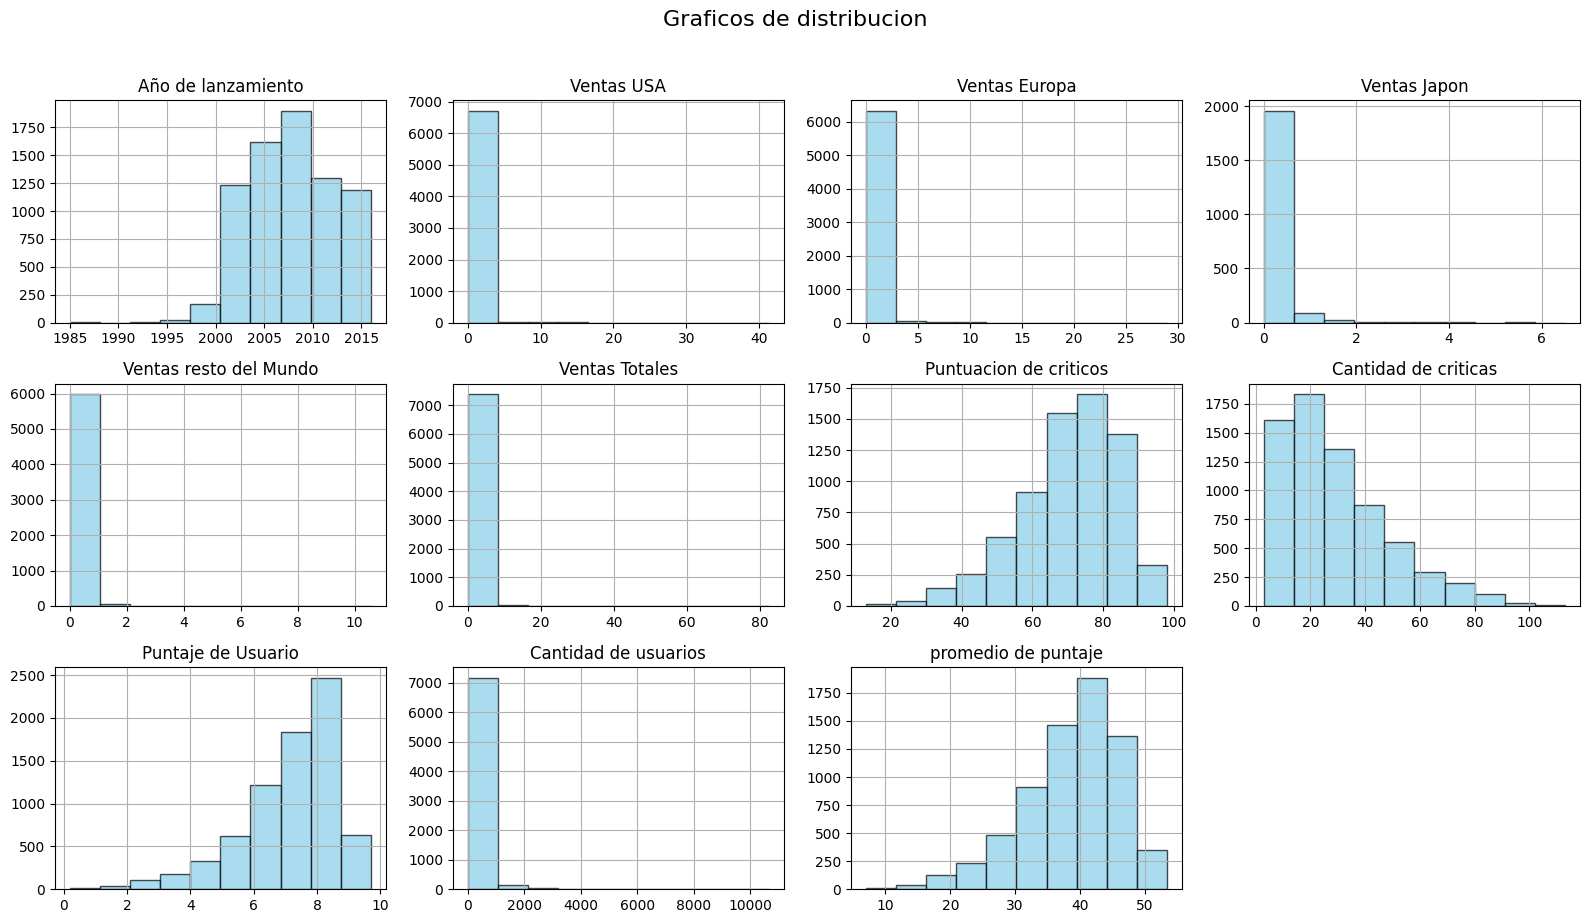

In [120]:
generar_hist(df)

# GESTION DE DATOS NULOS

In [122]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer,KNNImputer, IterativeImputer
from sklearn.linear_model import BayesianRidge

In [123]:
##REEMPLAZO DE LOS DATOS 0 A NaN
df.replace(0,np.nan,inplace=True)

(df.isna().mean()*100).round(2).sort_values(ascending=False)

,0
Ventas Japon,71.76
Ventas resto del Mundo,18.79
Ventas Europa,14.32
Ventas USA,9.08
Cantidad de criticas,7.64
Puntuacion de criticos,7.64
promedio de puntaje,7.64
Clasificacion por Edad,1.12
Desarrollador,0.15
Publicador,0.03


In [100]:
columna_simple_imputer = ['Puntaje de Usuario']
columna_knn_imputer = ['Ventas USA','Ventas Europa','Cantidad de criticas','Puntuacion de criticos','promedio de puntaje','Ventas resto del Mundo']
columna_iterative_imputer = ['Ventas Japon']

In [109]:
df_imputed = df.copy()

In [111]:
imputer_simple = SimpleImputer(strategy='median')
df_imputed[columna_simple_imputer] = imputer_simple.fit_transform(df_imputed[columna_simple_imputer])

In [112]:
imputer_knn = KNNImputer(n_neighbors=5)
df_imputed[columna_knn_imputer] = imputer_knn.fit_transform(df_imputed[columna_knn_imputer])

In [113]:
imputer_iterative = IterativeImputer(
    estimator=BayesianRidge(max_iter=500), max_iter = 20,
    random_state=42,
    initial_strategy='median'
)
df_imputed[columna_iterative_imputer] = imputer_iterative.fit_transform(df_imputed[columna_iterative_imputer])

In [127]:
df_imputed.describe().round(2)

,Año de lanzamiento,Ventas USA,Ventas Europa,Ventas Japon,Ventas resto del Mundo,Ventas Totales,Puntuacion de criticos,Cantidad de criticas,Puntaje de Usuario,Cantidad de usuarios,promedio de puntaje
count,7435.00,7435.00,7435.00,7435.00,7435.00,7435.00,7435.00,7435.00,7435.00,7435.00,7435.00
mean,2007.69,0.40,0.24,0.11,0.09,0.75,70.14,28.57,7.13,163.16,38.65
std,4.30,0.93,0.66,0.27,0.26,1.89,13.52,18.65,1.50,564.63,7.19
min,1985.00,0.01,0.01,0.01,0.01,0.01,13.00,3.00,0.20,4.00,7.00
25%,2004.00,0.08,0.03,0.06,0.01,0.11,62.00,15.00,6.40,10.00,34.50
50%,2008.00,0.16,0.07,0.06,0.03,0.28,72.00,24.00,7.50,24.00,39.66
75%,2011.00,0.39,0.21,0.06,0.07,0.72,80.00,38.00,8.20,81.00,43.85
max,2016.00,41.36,28.96,6.50,10.57,82.53,98.00,113.00,9.70,10665.00,53.40


<Figure size 1600x900 with 0 Axes>

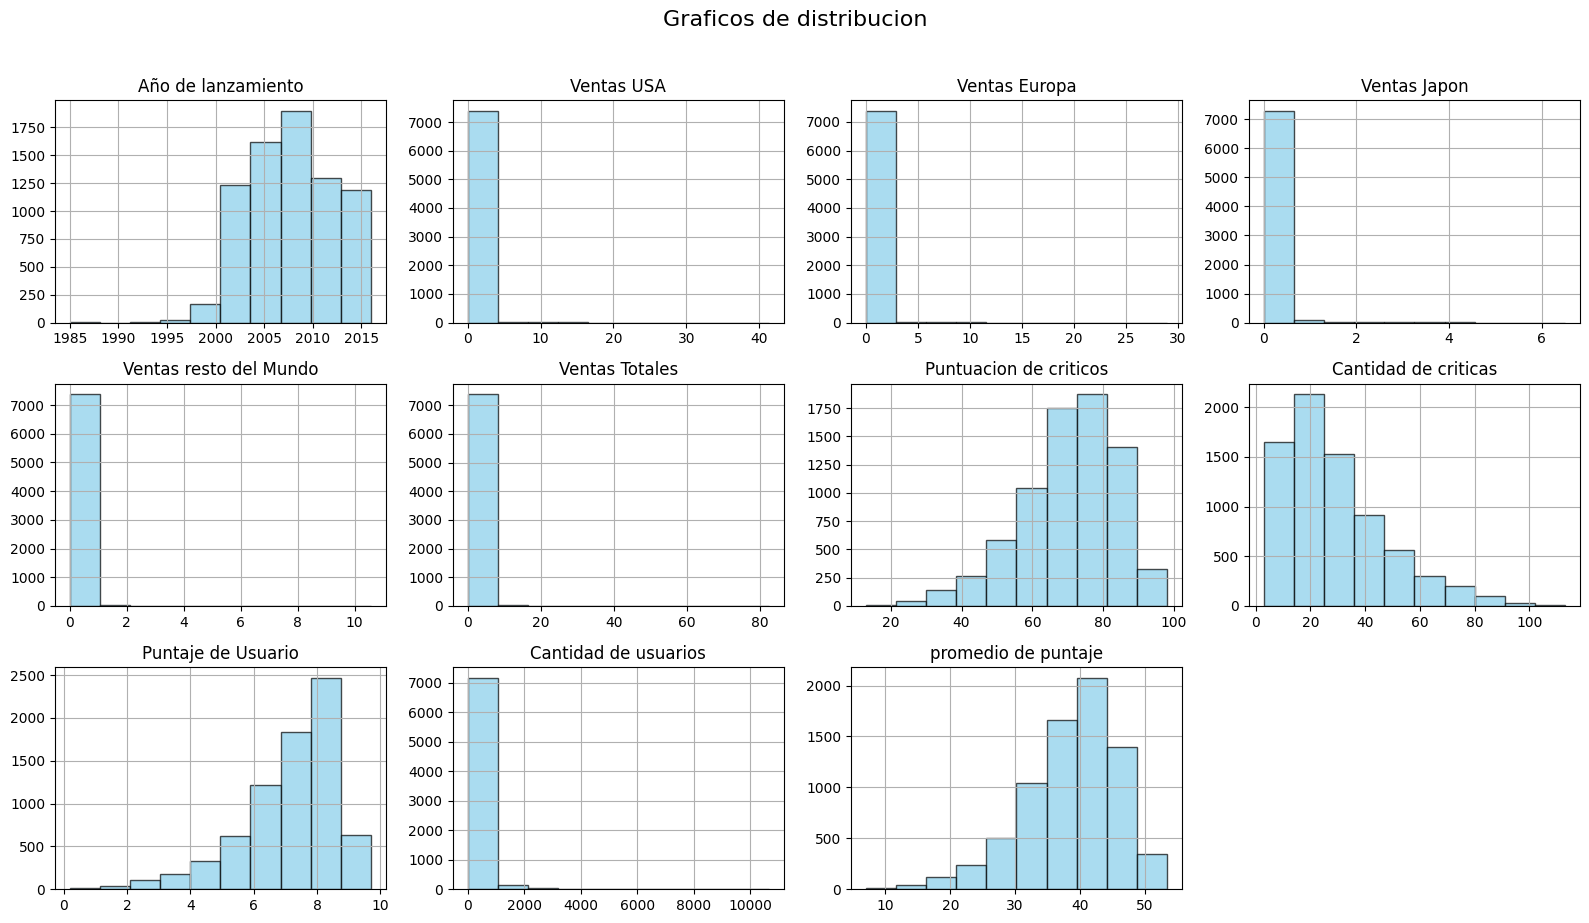

In [116]:
generar_hist(df_imputed)

# PUNTUACION SEGUN LA CRITICA

In [139]:
##PUNTUACION SEGUN LA CRITICA PARA PUBLICADOR, DESARROLLADOR Y JUEGO

#PUBLICADOR con los juegos con mayor, menor y el promedio de puntos segun la critica en orden descendente
pje_cri_publicador = df.loc[(df['Puntuacion de criticos'] > 0) & (df['Publicador'])].groupby('Publicador').agg({'Puntuacion de criticos':['mean','min','max','count']})
pje_cri_publicador = pje_cri_publicador.sort_values(by=('Puntuacion de criticos','mean'), ascending=False)
##print(f"\n\n{'TOP 10 DE LOS PUBLICADORES CON EL PROMEDIO MAS ALTO SEGUN LAS CRITICA'}\n\n",pje_cri_publicador.head(10))

#DESARROLLADOR con los juegos con mayor, menor y el promedio de puntos segun la critica en orden descendente
pje_cri_desarrollador = df.loc[(df['Puntuacion de criticos'] > 0) & (df['Desarrollador'])].groupby('Desarrollador').agg({'Puntuacion de criticos':['mean','min','max','count']})
pje_cri_desarrollador = pje_cri_desarrollador.sort_values(by=('Puntuacion de criticos','mean'), ascending=False)
##print(f"\n\n{'TOP 10 DE LOS DESARROLLADORES CON EL PROMEDIO MAS ALTO SEGUN LAS CRITICA'}\n\n",pje_cri_desarrollador.head(10))

##JUEGOS con mayor puntuacion segun la critica
pje_cri_juegos = df[['Puntuacion de criticos','Juego','Publicador','Año de lanzamiento']]
pje_cri_juegos_desc = pje_cri_juegos.sort_values(by='Puntuacion de criticos', ascending=False)
##print(f"\n\n{'TOP 10 DE LOS JUEGOS CON EL PROMEDIO MAS ALTO SEGUN LAS CRITICA'}\n\n",pje_cri_juegos_desc.head(10))##


GRAFICO PUNTUACION SEGUN LA CRITICA

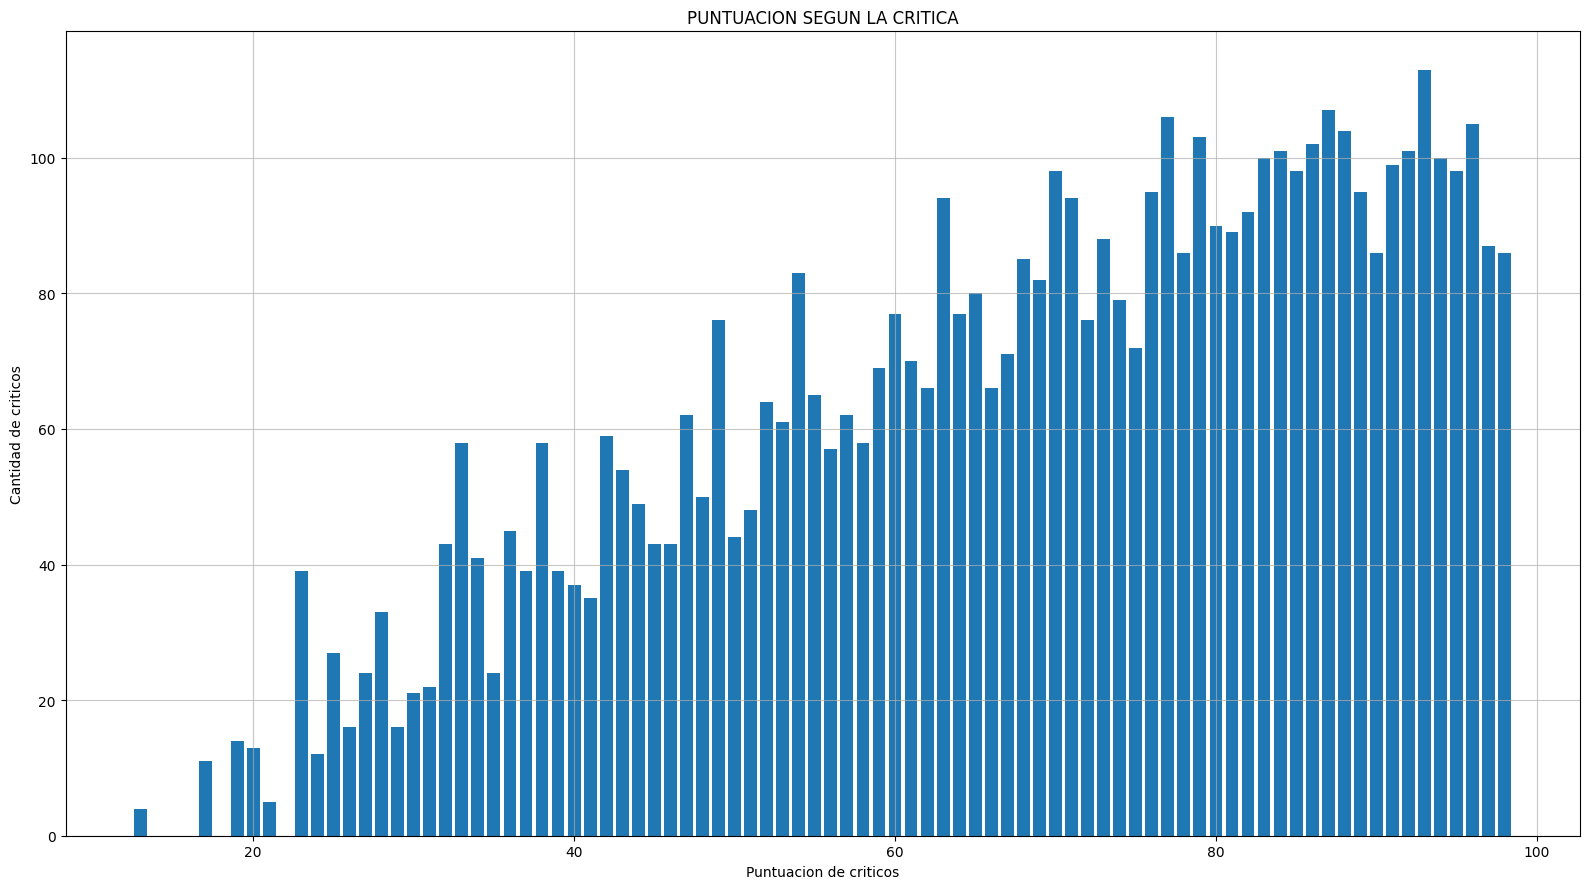

In [155]:
plt.figure(figsize= (16,9))

plt.bar(
  df['Puntuacion de criticos'],
  df['Cantidad de criticos'],
)

plt.title('PUNTUACION SEGUN LA CRITICA')
plt.xlabel('Puntuacion de criticos')
plt.ylabel('Cantidad de criticos')
plt.grid(True, alpha=0.7)

plt.tight_layout()
plt.show()

# PUNTUACION SEGUN USUARIOS

In [142]:
##PUNTUACION SEGUN LOS USUARIOS PARA PUBLICADOR, DESARROLLADOR Y JUEGO

#PUBLICADOR con los juegos con mayor, menor y el promedio de puntos segun los usuarios en orden descendente
pje_usu_publicador = df.loc[(df['Puntaje de Usuario'] > 0) & (df['Publicador'])].groupby('Publicador').agg({'Puntaje de Usuario':['mean','min','max','count']})
pje_usu_publicador = pje_usu_publicador.sort_values(by=('Puntaje de Usuario','mean'), ascending=False)
#print(f"\n\n{'TOP 10 DE LOS PUBLICADORES CON EL PROMEDIO MAS ALTO SEGUN LOS USUARIOS'}\n\n",pje_usu_publicador.head(10))

#DESARROLLADOR con los juegos con mayor, menor y el promedio de puntos segun los usuarios en orden descendente
pje_usu_desarrollador = df.loc[(df['Puntaje de Usuario'] > 0) & (df['Desarrollador'])].groupby('Desarrollador').agg({'Puntaje de Usuario':['mean','min','max','count']})
pje_usu_desarrollador = pje_usu_desarrollador.sort_values(by=('Puntaje de Usuario','mean'), ascending=False)
#print(f"\n\n{'TOP 10 DE LOS DESARROLLADORES CON EL PROMEDIO MAS ALTO SEGUN LOS USUARIOS'}\n\n",pje_usu_desarrollador.head(10))

##JUEGOS con mayor puntuacion segun los usuarios
pje_usu_juegos = df[['Puntaje de Usuario','Juego','Publicador','Año de lanzamiento']]
pje_usu_juegos_desc = pje_usu_juegos.sort_values(by='Puntaje de Usuario', ascending=False)
#print(f"\n\n{'TOP 10 DE LOS JUEGOS CON EL PROMEDIO MAS ALTO SEGUN LOS USUARIOS'}\n\n",pje_usu_juegos_desc.head(10))



Grafico de Puntuacion segun los usuarios

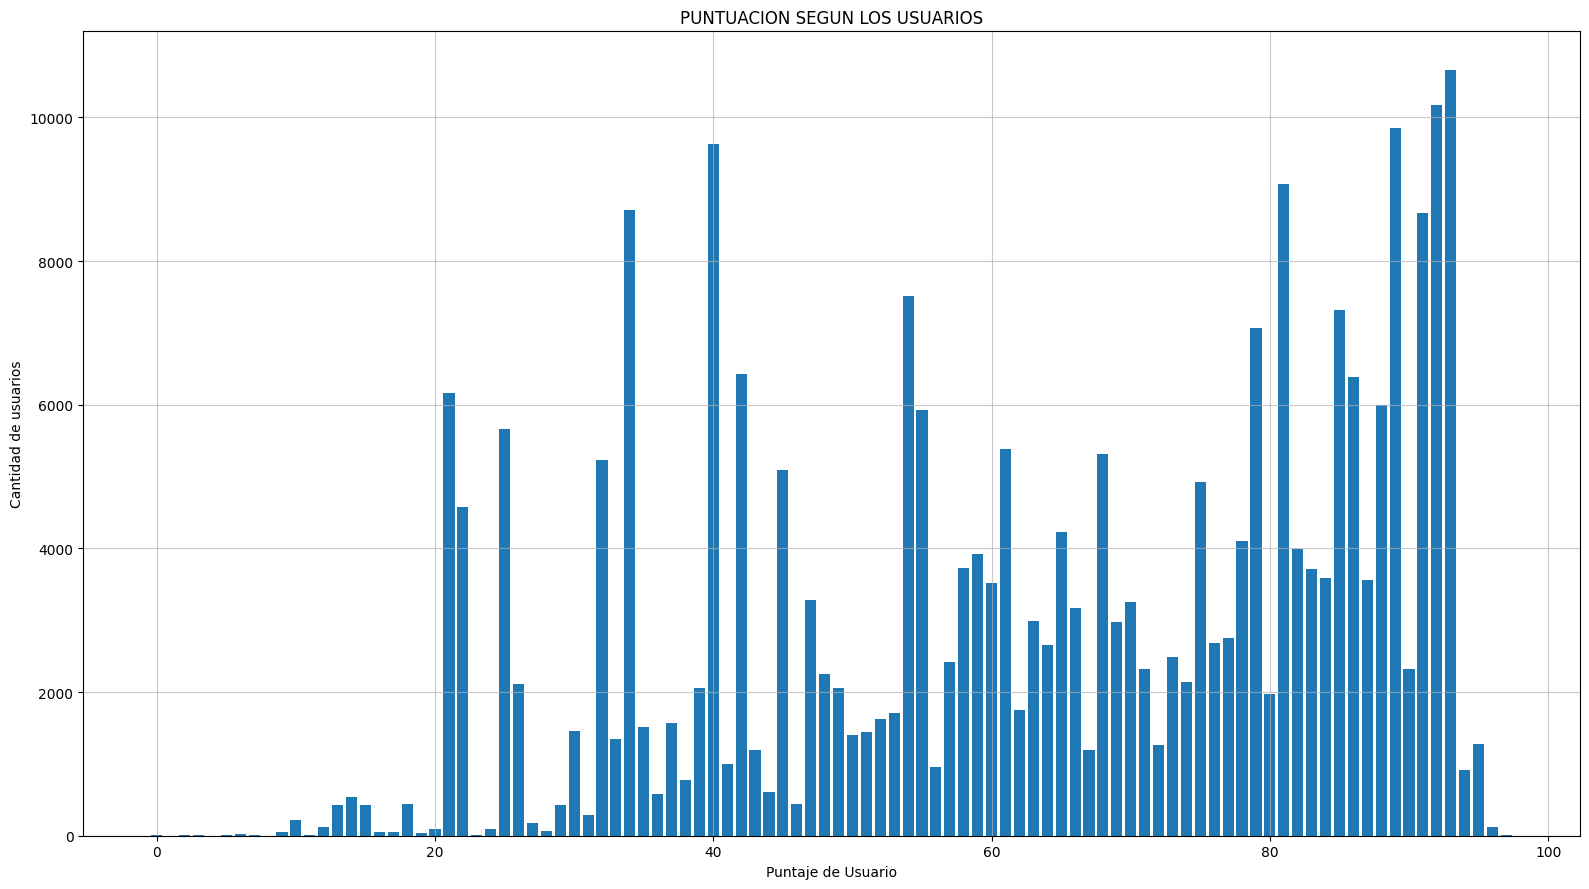

In [158]:
plt.figure(figsize= (16,9))

plt.bar(
  puntaje_usuarios,
  df['Cantidad de usuarios'],
)

plt.title('PUNTUACION SEGUN LOS USUARIOS')
plt.xlabel('Puntaje de Usuario')
plt.ylabel('Cantidad de usuarios')
plt.grid(True, alpha=0.7)

plt.tight_layout()
plt.show()

# PUNTUACION TOTAL (promedio de puntajes dados entre usuarios y la critica)

In [144]:
##DESARROLLADOR con mayor puntuacion Total

promedio_des_pje = df.loc[df[('promedio de puntaje')].notna() & (df['Desarrollador'].notna())].groupby('Desarrollador').agg({'promedio de puntaje':['max']})
promedios_des_pje = promedio_des_pje.sort_values(by=('promedio de puntaje','max'), ascending=False)
#print(f"\n\n{'Puntuacion total de los Desarrolladores'}\n\n",promedios_des_pje.head(10))

promedio_pub_pje = df.loc[df[('promedio de puntaje')].notna() & (df['Publicador'].notna())].groupby('Publicador').agg({'promedio de puntaje':['max']})
promedios_pub_pje = promedio_pub_pje.sort_values(by=('promedio de puntaje','max'), ascending=False)
#print(f"\n\n{'Puntuacion total de los Publicadores'}\n\n",promedios_pub_pje.head(10))

promedio_pje_juego = df.loc[df[('promedio de puntaje')].notna() & (df['Juego'].notna())].groupby('Juego').agg({'promedio de puntaje':['max']})
promedios_pub_juegos = promedio_pje_juego.sort_values(by=('promedio de puntaje','max'), ascending=False)
#print(f"\n\n{'Puntuacion total de los Juegos'}\n\n",promedios_pub_juegos.head(10))



Grafico de puntuacion total

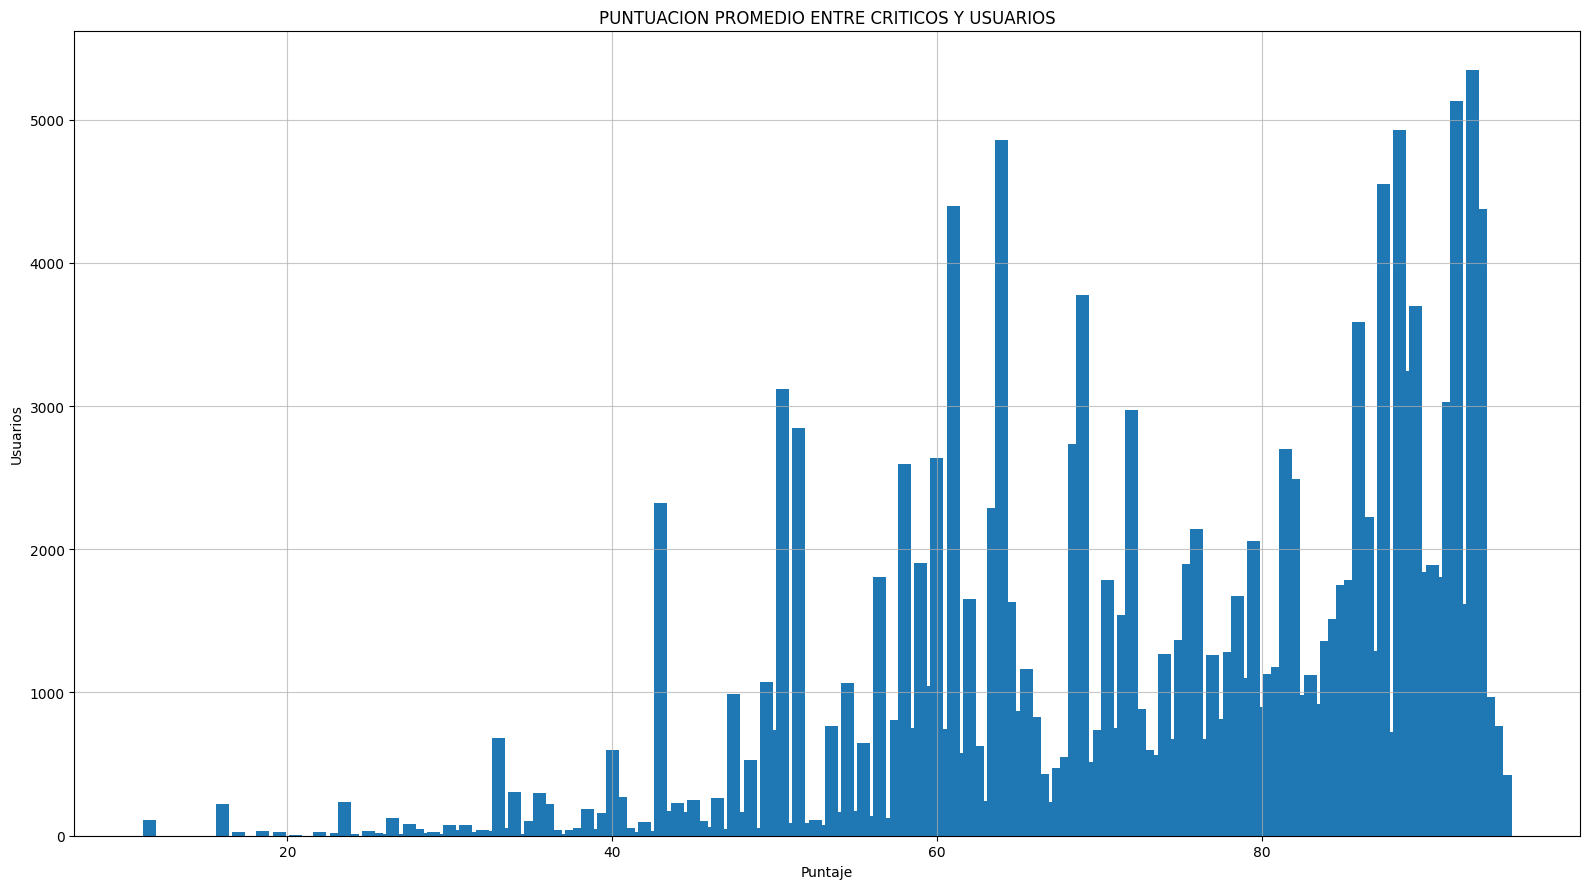

In [152]:
plt.figure(figsize= (16,9))

plt.bar(
  df['promedio de puntaje'],
  df['cantidad promedio de criticas']
)

plt.title('PUNTUACION PROMEDIO ENTRE CRITICOS Y USUARIOS')
plt.xlabel('Puntaje')
plt.ylabel('Usuarios')
plt.grid(True, alpha=0.7)

plt.tight_layout()
plt.show()

# EVALUACION SEGUN LAS VENTAS POR REGION Y MUNDIAL

In [176]:

##JUEGOS CON MAYORES VENTAS POR REGION Y MUNDIAL

ventas_usa = df[['Ventas USA','Juego','Publicador','Desarrollador','Año de lanzamiento']]
venta_usa = ventas_usa.sort_values(by='Ventas USA', ascending=False)

ventas_euro = df[['Ventas Europa','Juego','Publicador','Desarrollador','Año de lanzamiento']]
venta_euro = ventas_euro.sort_values(by='Ventas Europa', ascending=False)

ventas_japon= df[['Ventas Japon','Juego','Publicador','Desarrollador','Año de lanzamiento']]
venta_japon = ventas_japon.sort_values(by='Ventas Japon', ascending=False)

ventas_resto = df[['Ventas resto del Mundo','Juego','Publicador','Desarrollador','Año de lanzamiento']]
venta_resto = ventas_resto.sort_values(by='Ventas resto del Mundo', ascending=False)

ventas_total= df[['Ventas Totales','Juego','Publicador','Desarrollador','Año de lanzamiento']]
venta_total = ventas_total.sort_values(by='Ventas Totales', ascending=False)

##DESARROLLADORES CON MAYORES VENTAS REGION Y MUNDIAL

venta_des_usa = df.groupby('Desarrollador')['Ventas USA'].sum()
ventas_des_usa = venta_des_usa.sort_values(ascending=False)

venta_des_euro = df.groupby('Desarrollador')['Ventas Europa'].sum()
ventas_des_euro = venta_des_euro.sort_values(ascending=False)

venta_des_japon = df.groupby('Desarrollador')['Ventas Japon'].sum()
ventas_des_japon = venta_des_japon.sort_values(ascending=False)

venta_des_resto = df.groupby('Desarrollador')['Ventas resto del Mundo'].sum()
ventas_des_resto = venta_des_resto.sort_values(ascending=False)

venta_des_total = df.groupby('Desarrollador')['Ventas Totales'].sum()
ventas_des_total = venta_des_total.sort_values(ascending=False)

##PUBLICADORES CON MAYORES VENTAS REGION Y MUNDIAL

venta_pub_usa = df.groupby('Publicador')['Ventas USA'].sum()
ventas_pub_usa = venta_pub_usa.sort_values(ascending=False)

venta_pub_euro = df.groupby('Publicador')['Ventas Europa'].sum()
ventas_pub_euro = venta_pub_euro.sort_values(ascending=False)

venta_pub_japon = df.groupby('Publicador')['Ventas Japon'].sum()
ventas_pub_japon = venta_pub_japon.sort_values(ascending=False)

venta_pub_resto = df.groupby('Publicador')['Ventas resto del Mundo'].sum()
ventas_pub_resto = venta_pub_resto.sort_values(ascending=False)

venta_pub_total = df.groupby('Publicador')['Ventas Totales'].sum()
ventas_pub_total = venta_pub_total.sort_values(ascending=False)


##REGIONES:

##ESTADOS UNIDOS
#print(f"\n\n{'VENTAS EN ESTADOS UNIDOS'}\n\n")
#print(f"\n\n{'Top 10 de los juegos mas vendidos en Estados Unidos'}\n\n",venta_usa.head(10))
#print(f"\n\n{'Top 10 de los desarrolladores con mas ventas en Estados unidos'}\n\n",ventas_des_usa.head(10))
#print(f"\n\n{'Top 10 de los publicadores con mas ventas en Estados unidos'}\n\n",ventas_pub_usa.head(10))

##EUROPA
#print(f"\n\n{'VENTAS EN EUROPA'}\n\n")
#print(f"\n\n{'Top 10 de los juegos mas vendidos en Europa'}\n\n",venta_euro.head(10))
#print(f"\n\n{'Top 10 de los desarrolladores con mas ventas en Europa'}\n\n",ventas_des_euro.head(10))
#print(f"\n\n{'Top 10 de los publicadores con mas ventas en Europa'}\n\n",ventas_pub_euro.head(10))

##JAPON
#print(f"\n\n{'VENTAS EN JAPON'}\n\n")
#print(f"\n\n{'Top 10 de los juegos mas vendidos en Japon'}\n\n",venta_japon.head(10))
#print(f"\n\n{'Top 10 de los desarrolladores con mas ventas en Japon'}\n\n",ventas_des_japon.head(10))
#print(f"\n\n{'Top 10 de los publicadores con mas ventas en Japon'}\n\n",ventas_pub_japon.head(10))

##RESTO DEL MUNDO
#print(f"\n\n{'VENTAS EN RESTO DEL MUNDO'}\n\n")
#print(f"\n\n{'Top 10 de los juegos con mas ventas en el resto del mundo'}\n\n",venta_resto.head(10))
#print(f"\n\n{'Top 10 de los Desarrolladores con mas ventas en el resto del mundo'}\n\n",ventas_des_resto.head(10))
#print(f"\n\n{'Top 10 de los publicadores con mas ventas en el resto del Mundo'}\n\n",ventas_pub_resto.head(10))

##MUNDIAL
#print(f"\n\n{'VENTAS EN EL MUNDO'}\n\n")
#print(f"\n\n{'Top 10 de los juegos mas vendidos en el mundo'}\n\n",venta_total.head(10))
#print(f"\n\n{'Top 10 de los desarrolladores con mas ventas en el Mundo'}\n\n",ventas_des_total.head(10))
#print(f"\n\n{'Top 10 de los publicadores con mas ventas en el Mundo'}\n\n",ventas_pub_total.head(10))




GRAFICO DE VENTAS SEGUN REGION

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

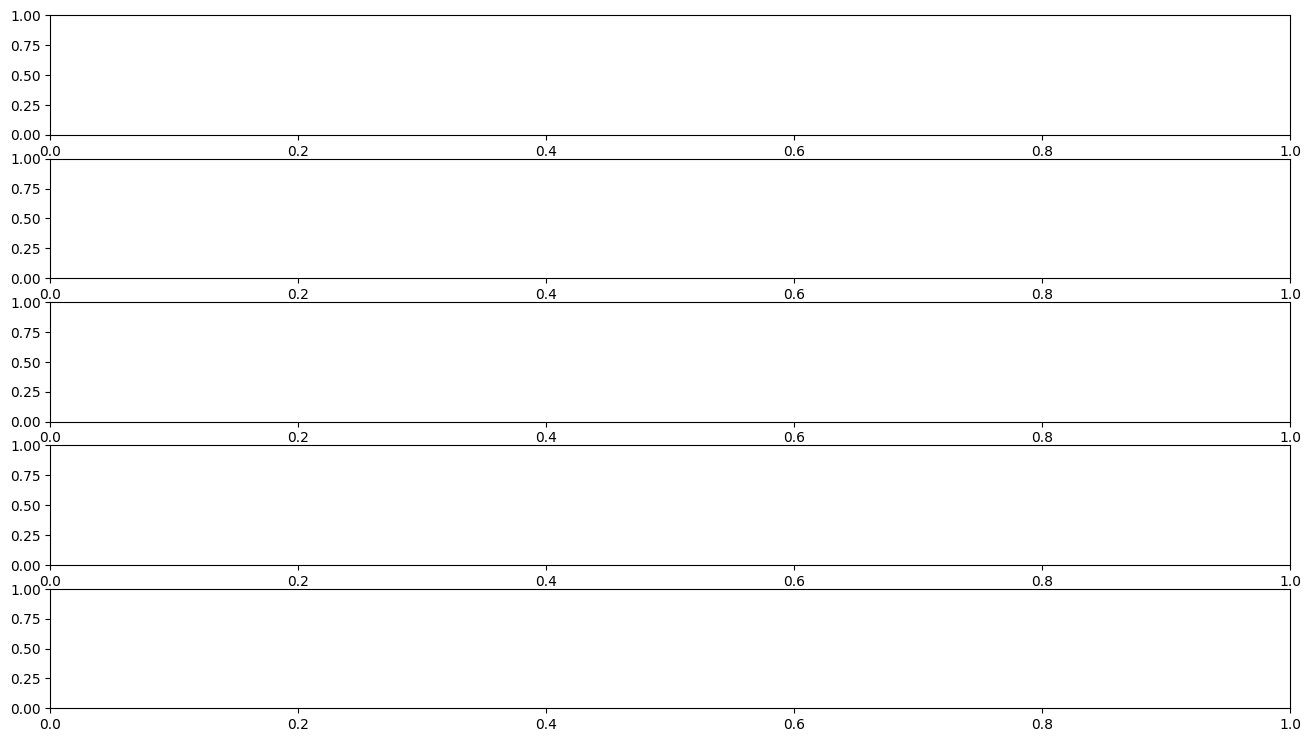

In [177]:
fig, axes = plt.subplots( 5 , 1,figsize= (16,9))

region = ['Estados Unidos','Europa','Japon','Resto del Mundo','Mundo']
ventas = [venta_usa,venta_euro,venta_japon,venta_resto,venta_total]

ax.plot(df['Ventas USA'],color='blue')
ax.set_title('VENTAS EN ESTADOS UNIDOS')
ax.set_ylabel('Ventas')
ax.grid(True, alpha=0.7)

plt.suptitle('VENTAS POR REGION', fontsize=16)
plt.tight_layout()
plt.show()




# AÑO PROMEDIO EN QUE SE VENDIO MAS JUEGOS POR CADA CONSOLA Y SUMA TOTAL DE JUEGOS VENDIDOS POR CONSOLA

In [50]:
## EL AÑO EN QUE SE VENDIO MAS JUEGOS POR CONSOLA

pcva = df.groupby('Consola')['Año de lanzamiento'].mean()
pcva_redondeo = round(pcva)
print(f"\n\n{'Año que se vendio mas juegos por consola'}\n\n",pcva_redondeo)

##TOTAL DE JUEGOS VENDIDOS POR CONSOLA

cma = df.groupby('Consola')['Ventas Totales'].sum()
cma = cma.sort_values(ascending=False)
cma_redondeo = round(cma)
print(f"\n\n{'Suma total de los juegos vendidos por consola'}\n\n",cma_redondeo,f"\n\n{'**El punto marca el millon*'}*")




Año que se vendio mas juegos por consola

 Consola
3DS     2013.0
DC      2000.0
DS      2007.0
GBA     2003.0
GC      2003.0
PC      2009.0
PS      1999.0
PS2     2004.0
PS3     2010.0
PS4     2015.0
PSP     2007.0
PSV     2013.0
Wii     2008.0
WiiU    2014.0
X360    2010.0
XB      2004.0
XOne    2015.0
Name: Año de lanzamiento, dtype: float64


Suma total de los juegos vendidos por consola

 Consola
PS2     981.0
X360    888.0
PS3     828.0
Wii     696.0
DS      413.0
PS4     245.0
PS      214.0
XB      213.0
PC      203.0
PSP     196.0
GC      160.0
GBA     138.0
XOne    134.0
3DS     127.0
WiiU     67.0
PSV      34.0
DC        5.0
Name: Ventas Totales, dtype: float64 

**El punto marca el millon**


# EL GENERO DE JUEGO MAS VENDIDO Y CON MEJOR PUNTAJE PROMEDIO

In [51]:
##GENEROS DE JUEGOS MAS VENDIDO

genero = df.groupby('Genero')['Ventas Totales'].sum()
genero_redondeo = round(genero)
generos = genero_redondeo.sort_values(ascending=False)
print(f"\n\n{'Genero de juegos mas vendidos'}\n\n",generos)


##TOP DE LOS GENEROS DE JUEGOS CON MAYOR PUNTAJE PROMEDIO(critica + usuarios)

puntaje_genero = df.loc[df[('promedio de puntaje')].notna() & (df['Genero'].notna())].groupby('Genero').agg({'promedio de puntaje':['mean']})
puntaje_genero = puntaje_genero.sort_values(by=('promedio de puntaje','mean'), ascending=False)
print(F"\n\n{'Top de los generos con el mayor puntaje promedio'}\n\n",puntaje_genero)



Genero de juegos mas vendidos

 Genero
Accion        1263.0
Deportes       900.0
Disparos       836.0
RPG            506.0
Carreras       488.0
Miscelania     435.0
Plataforma     385.0
Lucha          255.0
Simulacion     221.0
Aventura        95.0
Puzzle          80.0
Estrategia      78.0
Name: Ventas Totales, dtype: float64


Top de los generos con el mayor puntaje promedio

            promedio de puntaje
                          mean
Genero                        
Deportes             40.584175
RPG                  40.215568
Estrategia           40.055311
Disparos             39.023117
Puzzle               38.972881
Plataforma           38.797990
Simulacion           38.587583
Lucha                38.498021
Carreras             38.365956
Accion               37.474665
Miscelania           37.127461
Aventura             36.747093
